In [2]:
pip install -U scikit-learn

    100% |████████████████████████████████| 6.8MB 166kB/s ta 0:00:01
    100% |████████████████████████████████| 25.9MB 45kB/s eta 0:00:011 9% |███                             | 2.4MB 4.7MB/s eta 0:00:05    16% |█████▍                          | 4.4MB 5.9MB/s eta 0:00:04    69% |██████████████████████▏         | 18.0MB 1.6MB/s eta 0:00:06    79% |█████████████████████████▎      | 20.5MB 3.4MB/s eta 0:00:02    84% |███████████████████████████     | 21.8MB 4.3MB/s eta 0:00:01    91% |█████████████████████████████▏  | 23.6MB 3.1MB/s eta 0:00:01
    100% |████████████████████████████████| 307kB 797kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [3]:
#Displaying dataset
df_train=pd.read_csv('train.csv')
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
#Find the no.of missing values
total = df_train.isnull().sum().sort_values(ascending=False)
total

Loan_Status          0
Property_Area        0
Credit_History       0
Loan_Amount_Term     0
LoanAmount           0
CoapplicantIncome    0
ApplicantIncome      0
Self_Employed        0
Education            0
Dependents           0
Married              0
Gender               0
Loan_ID              0
dtype: int64

In [13]:

#Imputing Missing values with mean for continuous variable
df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mean(), inplace=True)
df_train['ApplicantIncome'].fillna(df_train['ApplicantIncome'].mean(), inplace=True)
df_train['CoapplicantIncome'].fillna(df_train['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)


# Replace missing value of Self_Employed with more frequent category
df_train['Self_Employed'].fillna('No',inplace=True)


In [20]:
pip install seaborn

    100% |████████████████████████████████| 225kB 730kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import seaborn as sns
%matplotlib inline

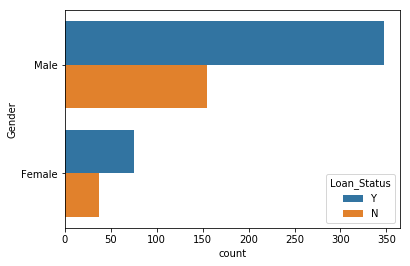

In [18]:
#Analysing the independent variables with the target variables

sns.countplot(y='Gender',hue='Loan_Status',data=df_train)

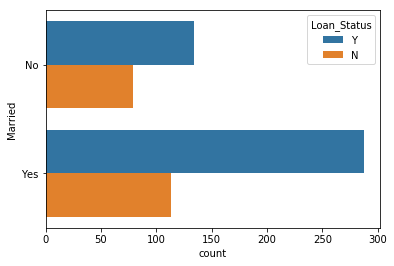

In [19]:
sns.countplot(y='Married',hue='Loan_Status',data=df_train)

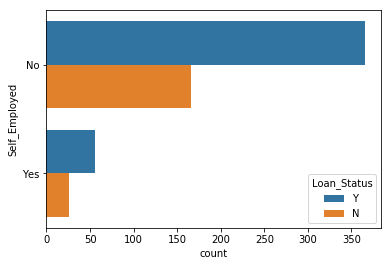

In [20]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data=df_train)

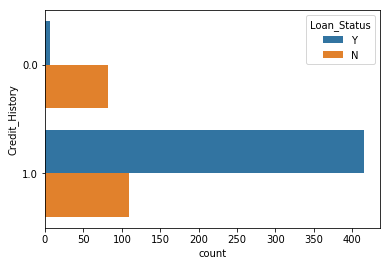

In [21]:
sns.countplot(y='Credit_History',hue='Loan_Status',data=df_train)

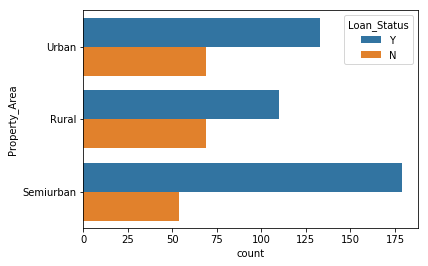

In [22]:
sns.countplot(y='Property_Area',hue='Loan_Status',data=df_train)

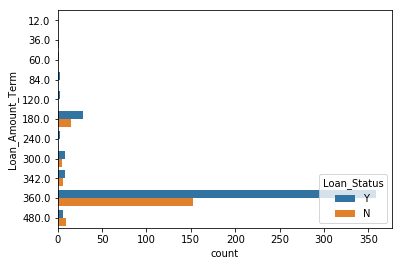

In [23]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=df_train)

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [44]:
# Convert all non-numeric values to numeric
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']

for var in cat:
    le = preprocessing.LabelEncoder()
    df_train[var]=le.fit_transform(df_train[var].astype('str'))
df_train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
dtype: object

In [29]:
#drop the unique loan id
df_train.drop("Loan_ID", axis = 1, inplace = True)

In [30]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(8), object(1)
memory usage: 57.7+ KB


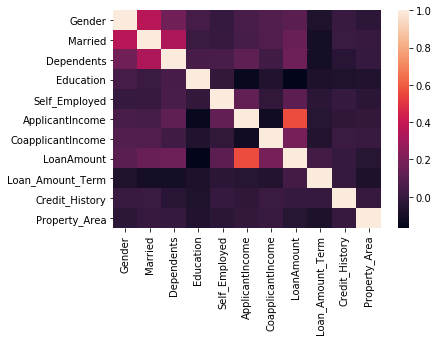

In [33]:

sns.heatmap(df_train.corr())

In [46]:
X=df_train.drop('Loan_Status',axis=1)
y=df_train['Loan_Status']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [47]:
#Obtaining the training and test variables via train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [48]:
#Building the model
model = LogisticRegression()

In [49]:
model.fit(X_train, y_train)

/home/adarsh/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [50]:
ypred = model.predict(X_test)
print(ypred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [51]:
#Evaluating the accuracy of the model
evaluation = f1_score(y_test, ypred)
evaluation

0.8923076923076922